# Recherche : Epidemic Social Network Agent

## Créer réseau avec N noeuds-agents

### L'Agent

In [1]:
import numpy as np
import networkx as nx
import random
import matplotlib.pyplot as plt

def sick(age):
    proba = {"-15":2,"15-19":5,"20-24":5,"25-29":5,
            "30-34":5,"35-39":5,"40-44":5,"45-49":8,
            "50-54":8,"55-59":9,"60-64":9,"65-69":7,
            "70-74":7,"75+":20}
    return random.randint(1,100) <= proba[age]

def SEXE():
    return (np.random.choice(["H","F"],1,p=(0.4830389870903283,0.5169610129096718)))[0] 
                                                    # data from https://www.insee.fr/fr/statistiques/2381474

def AGE(sexe):
    ages = ["-15","15-19","20-24","25-29",
            "30-34","35-39","40-44","45-49",
            "50-54","55-59","60-64","65-69",
            "70-74","75+"]
    proba = {"H":[0.18754895782679035,          #data from https://www.insee.fr/fr/statistiques/2381474
                  0.06560096238064546,
                  0.0596789978595579,
                  0.05616166462030588,
                  0.06069362679826506,
                  0.062821418275253,
                  0.06234238347096871,
                  0.06728042444430381,
                  0.06679687594754917,
                  0.06555871176269179,
                  0.0604446981937953,
                  0.05577305719238319,
                  0.05229407498643359,
                  0.07700414624105678],
             "F":[0.16809342908712088,
                  0.05808794058299792,
                  0.05403580065454643,
                  0.05364945357394002,
                  0.05994665851089682,
                  0.062188825772844784,
                  0.06052537579612718,
                  0.06431336173890041,
                  0.06450891659568143,
                  0.06469612249951011,
                  0.06189233752607613,
                  0.05906341962210516,
                  0.05674895214902336,
                  0.11224940589022935]}
    
    return (np.random.choice(ages,1,p=(proba[sexe])))[0]

class Agent:
    
    def __init__(self, sma, id_number, accointances): 
        self.id_number = id_number
        self.accointances = accointances
        self.sma = sma
        self.sexe = SEXE()
        self.age = AGE(self.sexe)
        self.sick = False
        self.contact = False
            
    def decide(self, tick):
        if self.sick:
            for voisin in self.accointances:
                v = self.sma.getAgent(voisin)
                v.contact = True
        elif self.contact:
            self.sick = sick(self.age)
                
        
    def __str__(self):
        res = "- Agent "+str(self.id_number)+" -"
        res += "\nCaractéristiques :"
        res += "\n\tSexe : "+self.sexe
        res += "\n\tAge : "+self.age
        return res
    
    def __repr__(self):
        return str(self)

### Le Système

In [2]:
import numpy as np
import networkx as nx
import random
import matplotlib.pyplot as plt
import matplotlib.animation as animation

class SMA:
    def __init__(self, nb_agents,graph,adjacency_matrix):
        self.tick = 0
        self.agentList = []
        self.finished = False
        self.graph = graph
        
        # Initialize accointances based on the matrix
        for i in range(nb_agents):
            self.agentList.append(Agent(self, i, np.nonzero(adjacency_matrix[i])[0]))
    
    def createSMA_graph(graph):
        matrix = nx.to_numpy_array(graph, nodelist=range(graph.number_of_nodes()))
        return SMA(graph.number_of_nodes(),graph, matrix)
    
    def createSMA_nbagents(nb_agents,nb_connect):
        graph = nx.barabasi_albert_graph(nb_agents, nb_connect)
        return SMA.createSMA_graph(graph)
    
    def run(self, rounds):
        self.tick = 0
        self.healAll()
        self.setSick(random.randint(0,len(self.agentList)-1))
        while(not(self.allSick()) and self.tick<rounds):
            self.runOnce()
        self.getNbSick()
            

    def runOnce(self):
        self.tick += 1
        for agent in self.agentList:
            agent.decide(self.tick)
        plt.close()
        self.show()
            
    def getAgent(self,i):
        return self.agentList[i]
    
    def allSick(self):
        return all([agent.sick for agent in self.agentList])
    
    def setSick(self,i):
        self.getAgent(i).sick = True
        
    def getNbSick(self):
        nbSick = 0
        nbContact = 0
        nbHeal = 0
        for agent in self.agentList:
            if agent.sick:
                nbSick += 1
            elif agent.contact:
                nbContact += 1
            else:
                nbHeal += 1
        print("nbSick = "+str(nbSick)+"\nnbContact = "+str(nbContact)+"\nnbHeal = "+str(nbHeal)+"\nnbTotal = "+str(nbSick+nbHeal+nbContact))
        
    def heal(self,i):
        self.getAgent(i).sick = False
        
    def healAll(self):
        for i in range(len(self.agentList)):
            self.heal(i)
            
    def show(self):
        plt.figure(figsize=(10,5))
        colors = []
        for agent in self.agentList:
            if agent.sick:
                colors += ["red"]
            elif agent.contact:
                colors += ["green"]
            else:
                colors += ["blue"]
        nx.draw_networkx(self.graph, node_color=colors)
        plt.axis('off')
        plt.show()
            
            

### Usage

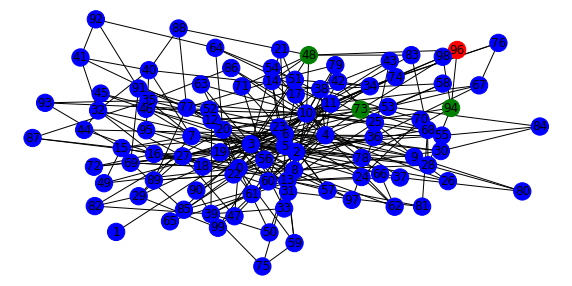

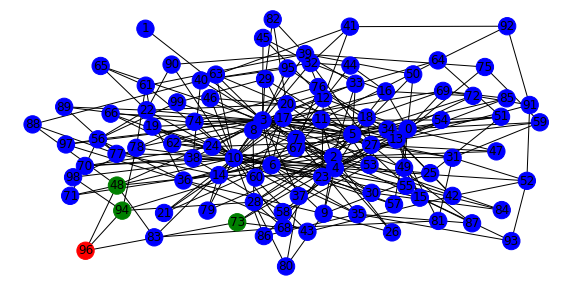

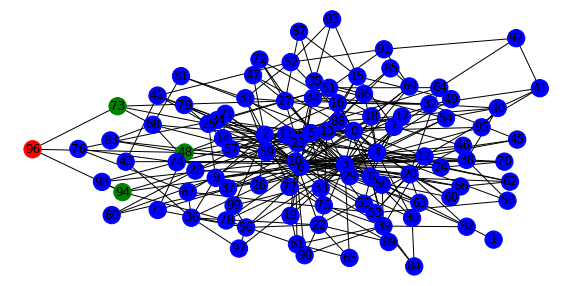

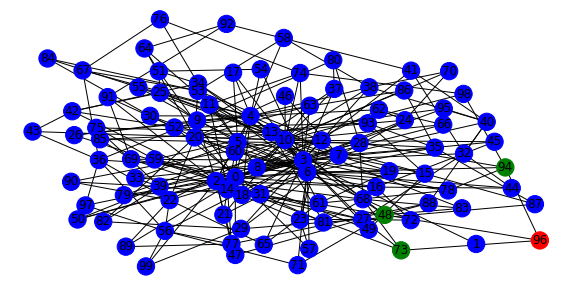

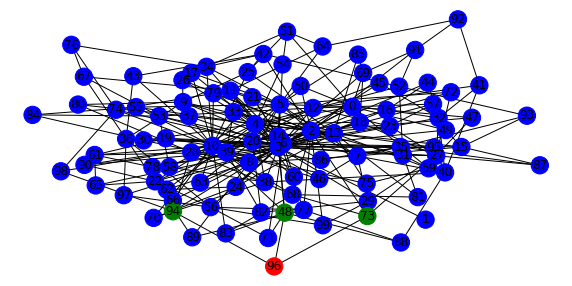

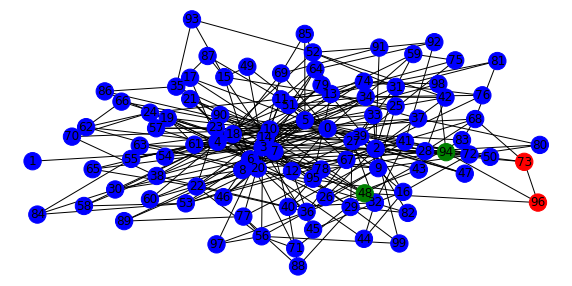

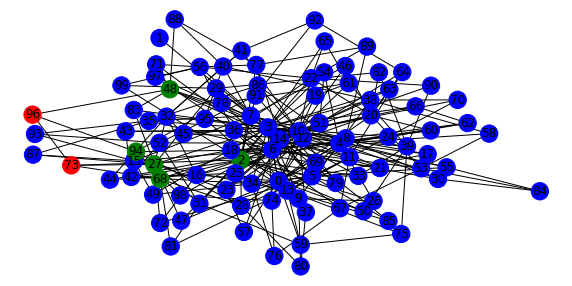

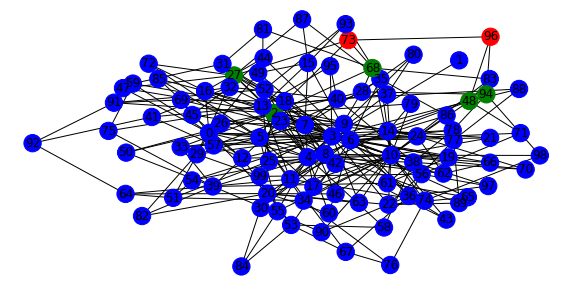

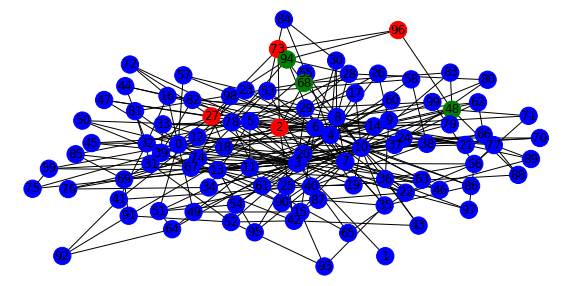

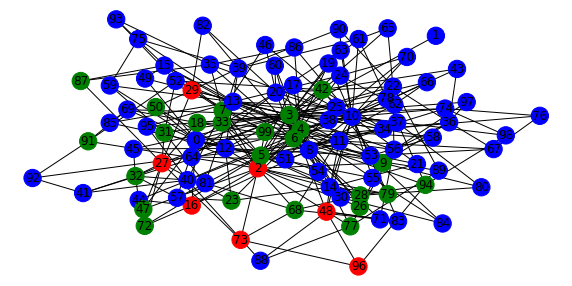

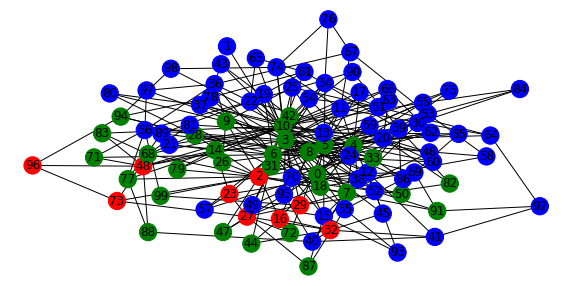

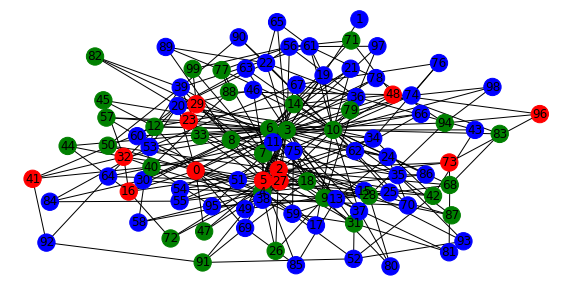

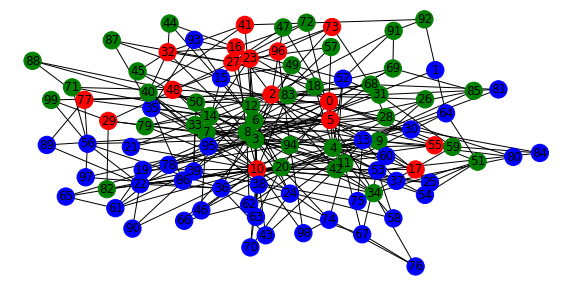

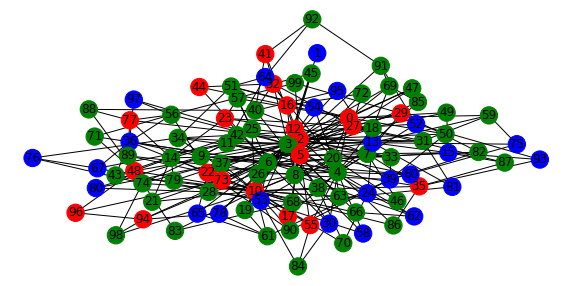

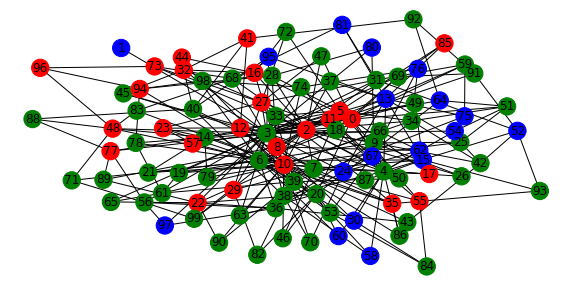

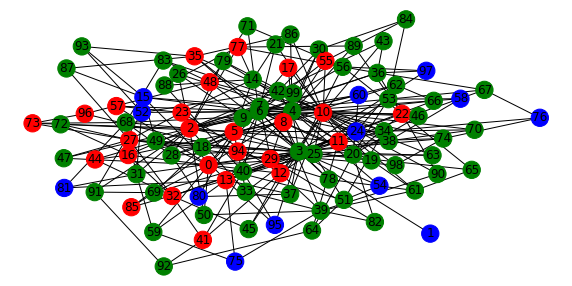

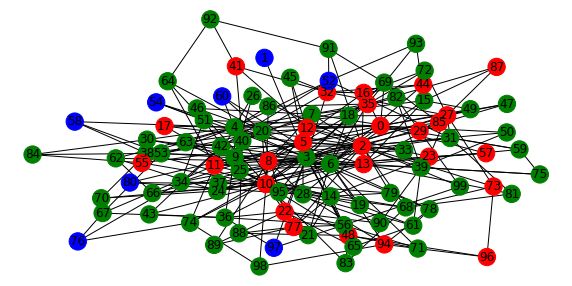

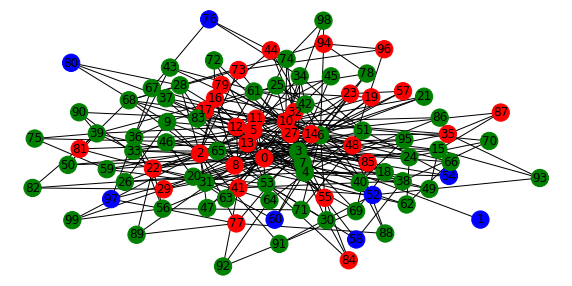

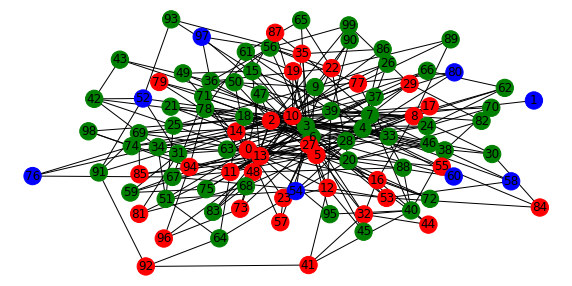

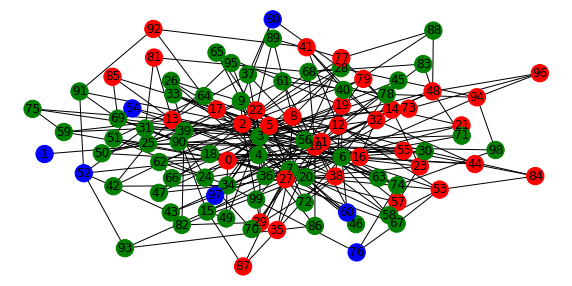

nbSick = 36
nbContact = 57
nbHeal = 7
nbTotal = 100


In [5]:
N = 100
sma = SMA.createSMA_nbagents(N,3)
sma.run(20)

## Courbes réanimations / décès

C:\Users\Utilisateur\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3263: DtypeWarning: Columns (17,18) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


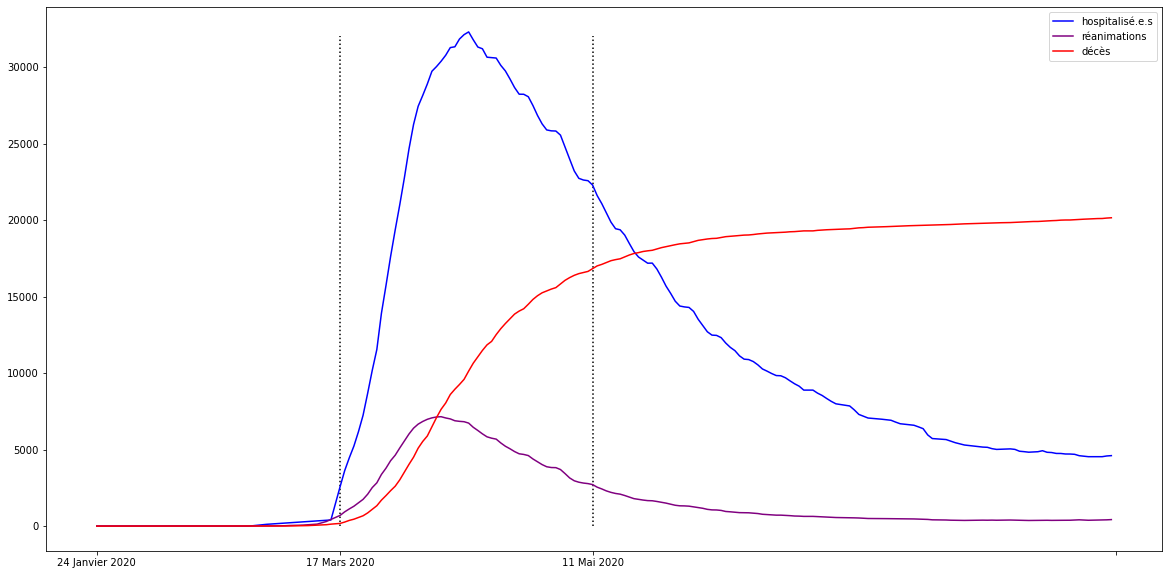

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from covidNetwork import *

data_nat = collecte_donnees()
#data_reg = collecte_donnees('regional')
#data_dep = collecte_donnees('departemental')
plt.figure(figsize=(20,10))
plt.plot(data_nat['hospitalises'], label='hospitalisé.e.s',color='blue')
plt.plot(data_nat['reanimation'],label='réanimations',color='purple')
plt.plot(data_nat['deces'],label='décès',color='red')
#plt.plot(data_nat['gueris'],label='guéris',color='green')
plt.vlines("2020-03-17", 0, 32000, linestyles ="dotted", colors ="k")
plt.vlines("2020-05-11", 0, 32000, linestyles ="dotted", colors ="k")


plt.xticks( ["2020-01-24","2020-03-17","2020-05-11","2020-09-"], ["24 Janvier 2020","17 Mars 2020","11 Mai 2020"] )


plt.legend()
plt.show()

In [6]:
data_nat["deces"]["2020-05-11"]

16820.0